In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
sample = pd.read_csv('schedule/compiled_sample_schedule.csv')
suggested = pd.read_csv('schedule/compiled_suggested_schedule.csv')

In [3]:
suggested


,dimension_1,dimension_2,imp_1,imp_2,imp_3,imp_4,imp_5,imp_6,imp_7,od_1,...,imp_col_2,imp_col_3,imp_col_4,imp_col_5,imp_col_6,imp_col_7,algorithm,perf_dirty,perf_1,perf_2
0,accuracy,completeness,impute_standard,impute_standard,impute_standard,impute_standard,impute_standard,impute_standard,impute_standard,NaN,...,Age,Graduat,Profession,Experience,SpendingScore,FamilySize,DecisionTree,0.778336,0.766231,0.766132
1,accuracy,completeness,impute_standard,impute_random_forest,impute_standard,impute_standard,impute_random_forest,impute_standard,impute_random_forest,NaN,...,Age,Graduat,Profession,Experience,SpendingScore,FamilySize,LogisticRegression,0.810384,0.813225,0.812518
2,accuracy,completeness,impute_standard,impute_median,impute_standard,impute_mode,impute_median,impute_mode,impute_median,NaN,...,Age,Graduat,Profession,Experience,SpendingScore,FamilySize,KNN,0.778718,0.794066,0.776872
3,accuracy,completeness,impute_standard,impute_standard,impute_standard,impute_standard,impute_standard,impute_standard,impute_standard,NaN,...,Age,Graduat,Profession,Experience,SpendingScore,FamilySize,RandomForest,0.815060,0.804800,0.808580
4,completeness,accuracy,impute_mode,impute_standard,impute_mode,impute_mode,impute_standard,impute_mode,impute_standard,NaN,...,Age,Graduat,Profession,Experience,SpendingScore,FamilySize,AdaBoost,0.811262,0.816557,0.810667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30235,accuracy,completeness,impute_random_forest,impute_standard,impute_random_forest,impute_standard,impute_standard,impute_random_forest,impute_standard,NaN,...,SpendingScore,Experience,Profession,Graduat,Age,Gender,LogisticRegression,0.812775,0.804149,0.806541
30236,accuracy,completeness,impute_median,impute_mode,impute_median,impute_mode,impute_standard,impute_median,impute_standard,NaN,...,SpendingScore,Experience,Profession,Graduat,Age,Gender,KNN,0.780134,0.768460,0.765466
30237,accuracy,completeness,impute_standard,impute_standard,impute_standard,impute_standard,impute_standard,impute_standard,impute_standard,NaN,...,SpendingScore,Experience,Profession,Graduat,Age,Gender,RandomForest,0.810086,0.800954,0.782292
30238,completeness,accuracy,impute_standard,impute_mode,impute_standard,impute_mode,impute_mode,impute_standard,impute_mode,NaN,...,SpendingScore,Experience,Profession,Graduat,Age,Gender,AdaBoost,0.825792,0.818772,0.807141


In [4]:
models = ['DecisionTree','LogisticRegression','KNN','RandomForest','AdaBoost','SVC']

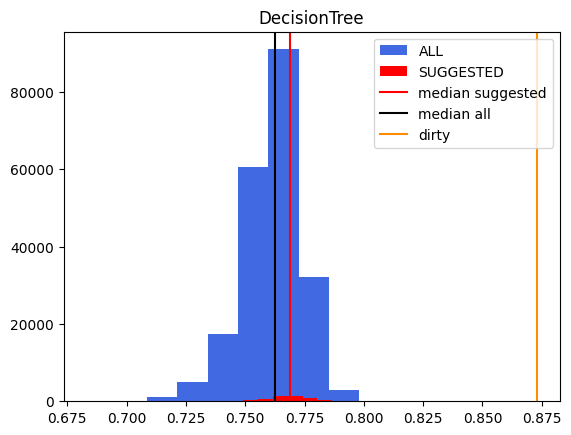

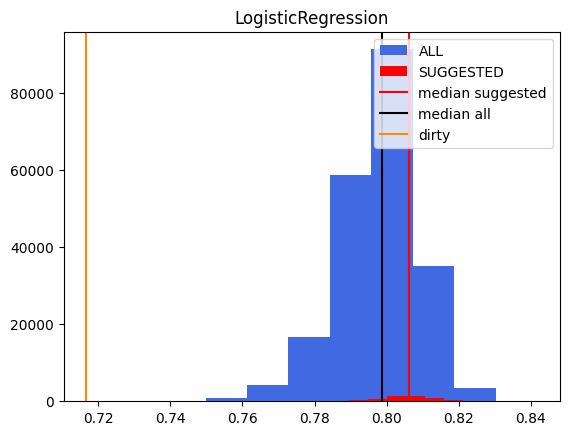

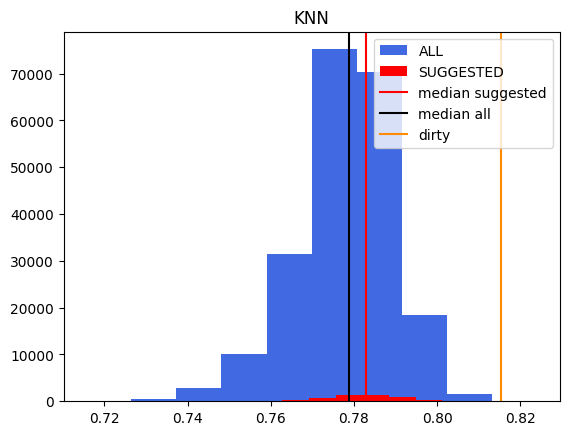

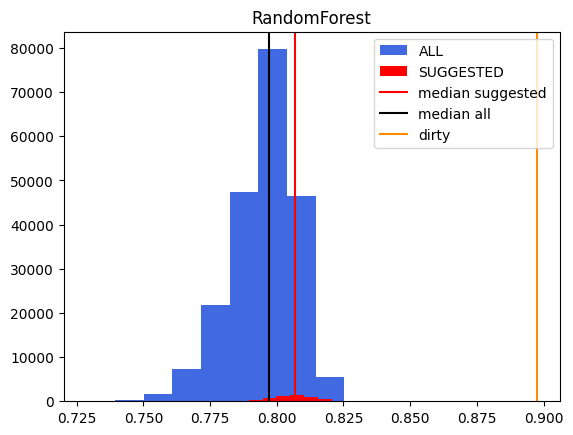

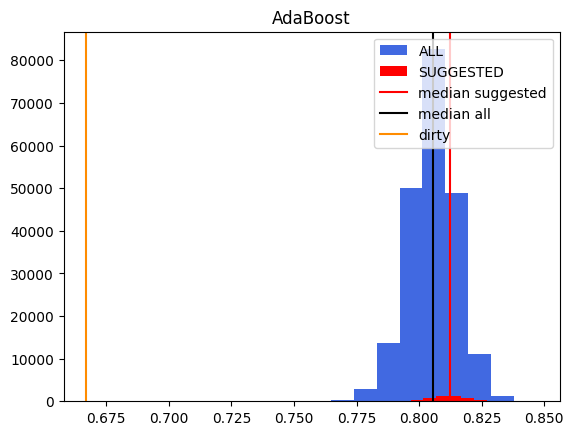

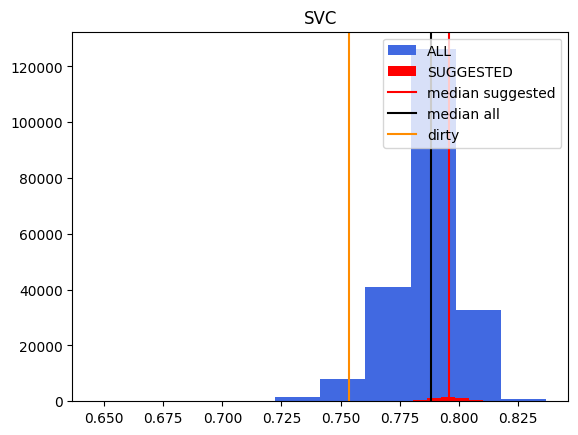

In [5]:
for algorithm in models:

    sample = pd.read_csv('schedule/compiled_sample_schedule.csv')
    suggested = pd.read_csv('schedule/compiled_suggested_schedule.csv')

    suggested = suggested[suggested.algorithm == algorithm]
    sample = sample[['dimension_1', 'dimension_2', 'imp_1', 'imp_2', 'imp_3', 'imp_4',
           'imp_5', 'imp_6', 'imp_7', 'od_1', 'od_2', 'od_3', 'od_4', 'od_5',
           'od_6', 'od_7', 'imp_col_1', 'imp_col_2', 'imp_col_3', 'imp_col_4',
           'imp_col_5', 'imp_col_6', 'imp_col_7', algorithm + '_dirty', algorithm + '_1', algorithm + '_2']]

    original_perf = {
            'DecisionTree': 0.8730314885952215,
            'LogisticRegression': 0.7166503552028867,
            'KNN': 0.81529491393676,
            'RandomForest': 0.8975431406130385,
            'AdaBoost': 0.6669934606506549,
            'SVC': 0.7537471482401658
        }

    x = [sample[algorithm + '_1']]
    y = [suggested.perf_1]

    plt.title(algorithm)

    plt.hist(x, label='ALL', color='royalblue')
    plt.hist(y, label='SUGGESTED', color='red')

    plt.axvline(x=np.median(y), color='red', label='median suggested')
    plt.axvline(x=np.median(x), color='black', label='median all')

    #plt.axvline(x=np.percentile(y, 25), color='red', label='1Q suggested', linestyle='dashed')
    #plt.axvline(x=np.percentile(x, 25), color='black', label='1Q all', linestyle='dashed')

    #plt.axvline(x=np.percentile(y, 75), color='red', label='3Q suggested', linestyle='dashed')
    #plt.axvline(x=np.percentile(x, 75), color='black', label='3Q all', linestyle='dashed')

    plt.axvline(x=original_perf[algorithm], color='darkorange', label='dirty')

    plt.legend(loc='upper right')

    plt.savefig("/Users/camillasancricca/Desktop/" + algorithm + "1.png", bbox_inches='tight')
    plt.show()

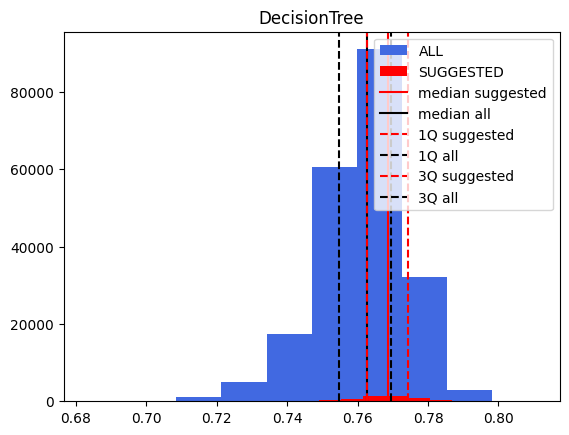

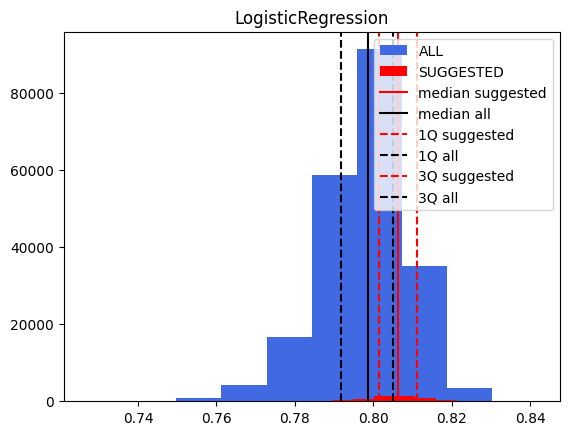

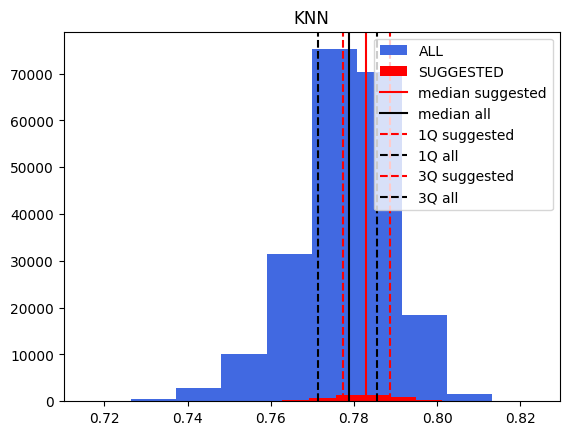

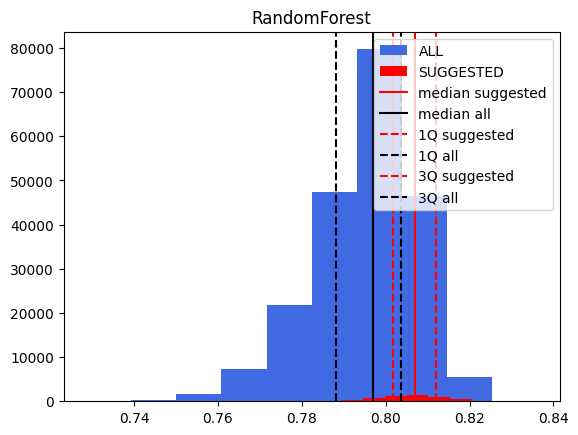

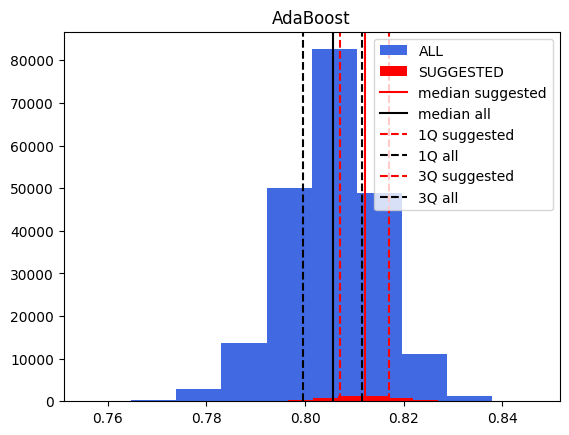

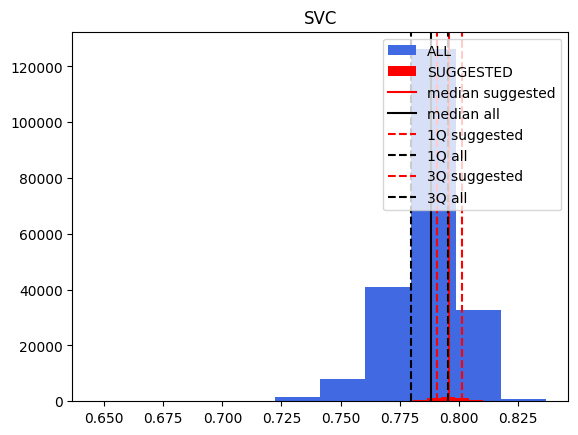

In [6]:
for algorithm in models:

    sample = pd.read_csv('schedule/compiled_sample_schedule.csv')
    suggested = pd.read_csv('schedule/compiled_suggested_schedule.csv')

    suggested = suggested[suggested.algorithm == algorithm]
    sample = sample[['dimension_1', 'dimension_2', 'imp_1', 'imp_2', 'imp_3', 'imp_4',
           'imp_5', 'imp_6', 'imp_7', 'od_1', 'od_2', 'od_3', 'od_4', 'od_5',
           'od_6', 'od_7', 'imp_col_1', 'imp_col_2', 'imp_col_3', 'imp_col_4',
           'imp_col_5', 'imp_col_6', 'imp_col_7', algorithm + '_dirty', algorithm + '_1', algorithm + '_2']]

    original_perf = {
            'DecisionTree': 0.8730314885952215,
            'LogisticRegression': 0.7166503552028867,
            'KNN': 0.81529491393676,
            'RandomForest': 0.8975431406130385,
            'AdaBoost': 0.6669934606506549,
            'SVC': 0.7537471482401658
        }

    x = [sample[algorithm + '_1']]
    y = [suggested.perf_1]

    plt.title(algorithm)

    plt.hist(x, label='ALL', color='royalblue')
    plt.hist(y, label='SUGGESTED', color='red')

    plt.axvline(x=np.median(y), color='red', label='median suggested')
    plt.axvline(x=np.median(x), color='black', label='median all')

    plt.axvline(x=np.percentile(y, 25), color='red', label='1Q suggested', linestyle='dashed')
    plt.axvline(x=np.percentile(x, 25), color='black', label='1Q all', linestyle='dashed')

    plt.axvline(x=np.percentile(y, 75), color='red', label='3Q suggested', linestyle='dashed')
    plt.axvline(x=np.percentile(x, 75), color='black', label='3Q all', linestyle='dashed')

    #plt.axvline(x=original_perf[algorithm], color='darkorange', label='dirty')

    plt.legend(loc='upper right')
    plt.savefig("/Users/camillasancricca/Desktop/" + algorithm + "2.png", bbox_inches='tight')
    plt.show()
